Michał Zych, michal.zych96@gmail.com

Michał Warzecha, warzmich@gmail.com

In [0]:
%tensorflow_version 1.x
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn import svm

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
def showOpencvImage(image, isGray=False):
    fig = plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap = 'gray')
    plt.show()

11493376/11490434 [==============================] - 0s 0us/step
70000


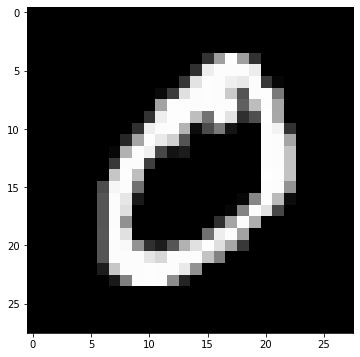

0


In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

im_list = [train_images[i] for i in range(0,train_images.shape[0])] + [test_images[i] for i in range(0,test_images.shape[0])]
print(len(im_list))

showOpencvImage(train_images[1])
print(train_labels[1])



In [0]:
imData = [np.reshape(im,train_images.shape[1]*train_images.shape[2]) for im in im_list]

imData = np.float32(imData)
print(imData.shape)

(70000, 784)


**SVM**

In [0]:
#Funkcja do wyboru najlepszych parametrow modelu SVM w przedziale C = 10:20, gamma = 0.1:0.9
def best_SVM_model_based_on_cross_validation(train_data, train_labels):
  Cs = np.arange(10, 20, 0.5).tolist()
  gammas = np.arange(0.1, 0.9, 0.1).tolist()
  len_validation_data = len(train_data)/5
  max_correct =0
  best_C = 0
  best_gamma = 0
  len_training_data_cs = int(4* len_validation_data)
  
  for C in Cs:
    for gamma in gammas:
      model = svm.SVC(C=C, gamma=gamma)
      model = model.fit(train_data[0:len_training_data_cs,:],train_labels[0:len_training_data_cs])

      pred_labels = model.predict(train_data[len_training_data_cs:,:])

      mask = pred_labels==train_labels[len_training_data_cs:]
      correct = np.count_nonzero(mask)
      if correct > max_correct:
        max_correct = correct
        best_C = C
        best_gamma = gamma

  model = svm.SVC(C=best_C, gamma=best_gamma)
  model = model.fit(train_data, train_labels)
  return model

In [0]:
model = best_SVM_model_based_on_cross_validation(imData[0:600,:],train_labels[0:600])

pred_labels = model.predict(imData[600:1000,:])

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

mask = pred_labels==train_labels[600:1000]
correct = np.count_nonzero(mask)
print(correct*100.0/pred_labels.size)

cm = confusion_matrix(train_labels[600:1000], pred_labels)
print(cm)
print(classification_report(train_labels[600:1000], pred_labels))

9.25
[[ 0 39  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.09      1.00      0.17        37
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        41
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00        55
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        35

    accuracy                           0.09       400
   macro avg  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier

#Funkcja do wyboru najlepszych parametrow modelu RandomForest w przedziale max_depth = 10:20, n_estimators = 50:150, max_features = 50:70
def best_random_forest_model_based_on_cross_validation(train_data, train_labels):
  max_depth = list(range(10,21))
  n_estimators = list(range(50,151,10))
  max_features = list(range(50,70,10))
  len_validation_data = len(train_data)/5
  max_correct =0
  best_max_depth = 0
  best_n_estimators = 0
  best_max_features = 0
  len_training_data_cs = int(4* len_validation_data)
  
  for depth in max_depth:
    for estimator in n_estimators:
      for features in max_features:
        rfc = RandomForestClassifier(max_depth=depth, n_estimators=estimator, max_features=features)
        rfc = rfc.fit(train_data[0:len_training_data_cs,:],train_labels[0:len_training_data_cs])

        pred_labels = rfc.predict(train_data[len_training_data_cs:,:])

        mask = pred_labels==train_labels[len_training_data_cs:]
        correct = np.count_nonzero(mask)
        if correct > max_correct:
          max_correct = correct
          best_max_depth = depth
          best_n_estimators = estimator
          best_max_features = features

  rfc = RandomForestClassifier(max_depth=best_max_depth, n_estimators=best_n_estimators, max_features=best_max_features)
  rfc = rfc.fit(train_data, train_labels)
  return rfc

In [0]:
rfc =  best_random_forest_model_based_on_cross_validation(imData[0:600,:],train_labels[0:600])

pred_labels = rfc.predict(imData[600:1000,:])

mask = pred_labels==train_labels[600:1000]
correct = np.count_nonzero(mask)
print(correct*100.0/pred_labels.size)

cm = confusion_matrix(train_labels[600:1000], pred_labels)
print(cm)
print(classification_report(train_labels[600:1000], pred_labels))

82.0
[[36  0  2  0  0  0  0  0  1  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  3 27  1  2  0  0  1  1  0]
 [ 2  0  0 30  0  0  0  0  0  2]
 [ 0  0  1  1 41  0  1  0  0  2]
 [ 0  0  1  7  1 28  2  1  0  1]
 [ 0  1  4  0  1  3 30  1  0  0]
 [ 0  3  1  1  2  0  0 46  0  2]
 [ 0  2  1  3  0  2  3  0 27  0]
 [ 1  0  1  0  4  0  1  2  0 26]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        39
           1       0.80      1.00      0.89        37
           2       0.71      0.77      0.74        35
           3       0.70      0.88      0.78        34
           4       0.80      0.89      0.85        46
           5       0.85      0.68      0.76        41
           6       0.81      0.75      0.78        40
           7       0.90      0.84      0.87        55
           8       0.93      0.71      0.81        38
           9       0.79      0.74      0.76        35

    accuracy                           0.82       400
   macro avg  

**WNIOSKI:**

Model SVM nie radzi sobie na surowych danych. Model RFC radzi sobie znacznie lepiej od SVM ale gorzej od sieci neuronowej.